#### ΔΠΜΣ - ΕΔΕΜΜ Ορφανουδάκης Φίλιππος Σκόβελεφ AM: 03400107.

##### Η πρώτη εργασία παραδόθηκε με τους λογαριασμούς του προπτυχιακού και με τον αντίστοιχο ΑΜ.
##### Πλέον έχω στα χέρια μου νέο ιδρυματικό μέιλ και κωδικό , όπως και νέο ΑΜ , το οποίο θα κάνω χρήση για τις υπόλοιπες εργασίες

<h2>2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις τεχνικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες επιπρόσθετες, με στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [1]:
%matplotlib inline

import sys
import itertools
import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering

<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων και της πολυπλοκότητας ανάλυσης που ανακύπτει. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Ο βαθμός κάθε κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Ο συντελεστής ομαδοποίησης κάθε κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Την ενδιαμεσική εγώκεντρικότητα κάθε κόμβου και τη μέση ενδιαμεσική εγωκεντρικότητα.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>
<p style=text-align:justify><b>Προσοχή!</b> Θα πρέπει να ελέγξετε αν οι γράφοι είναι κατευθυνόμενοι, δηλ. οι αντίστοιχοι πίνακες γειτνίασης είναι μη συμμετρικοί. Στην περίπτωση αυτή, θα πρέπει να τους μετατρέψετε σε μη-κατευθυνόμενους με τουλάχιστον το ίδιο πλήθος συνδέσεων, <b>προτού</b> εφαρμόσετε τους αλγόριθμους εντοπισμού κοινοτήτων του <b>πίνακα 2</b>. </p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες από την ιστοσελίδα <a style=text-decoration:none href="http://www-personal.umich.edu/~mejn/netdata/">http://www-personal.umich.edu/~mejn/netdata/</a> </caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>
<tr>
    <td style=text-align:left>Les Miserables</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/lesmis.zip'>lesmis.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>lesmis.gml</b> contains the weighted network of coappearances of
characters in Victor Hugo's novel "Les Miserables".  Nodes represent characters as indicated by the labels and edges connect any pair of characters that appear in the same chapter of the book.  The values on the edges are the number of such coappearances.  The data on coappearances were taken from D. E. Knuth, The Stanford GraphBase: A Platform for Combinatorial Computing, Addison-Wesley, Reading, MA (1993)</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Dolphin social network</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/dolphins.zip'>dolphins.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>dolphins.gml</b> contains an undirected social network of frequent associations between 62 dolphins in a community living off Doubtful Sound, New Zealand, as compiled by Lusseau et al. (2003)</p>
    </td>
</tr> 
</table>

<h4>1. Παραγωγή συνθετικών τοπολογιών</h4> 

In [2]:
#ΑΜ=03400107
n=170
d=4
M=750
R=0.15
p=0.3
k=4

REG = nx.watts_strogatz_graph(n,d,0)
RGER = nx.gnm_random_graph(n, M)

#we need to ensure connectivity for spectral clustering to work
RGG = nx.random_geometric_graph(n, R)
while nx.is_connected(RGG)==False:
    RGG = nx.random_geometric_graph(n, R)
    
SF = nx.barabasi_albert_graph(n, d)
SW = nx.watts_strogatz_graph(n,k,p)

<h4>2. Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.</h4>

In [3]:
#import football.gml from local file using nx.read_gml
football = nx.read_gml('football.gml')

In [4]:
#check if football is directed
nx.is_directed(football)

False

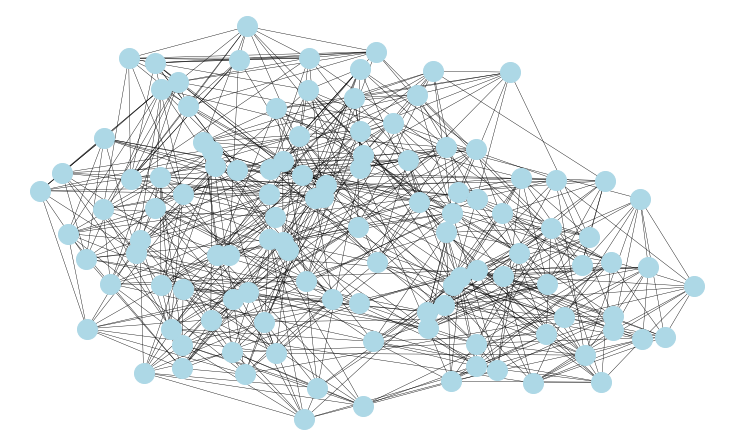

In [5]:
#visualize football
plt.figure(figsize=(10,6))
pos = nx.spring_layout(football, k=0.8)
nx.draw(football, pos , with_labels = False, width=0.4, 
        node_color='lightblue', node_size=400)

In [6]:
#import lesmis.gml
lesmis = nx.read_gml('lesmis.gml')

In [7]:
#check if lesmis is directed
nx.is_directed(lesmis)

False

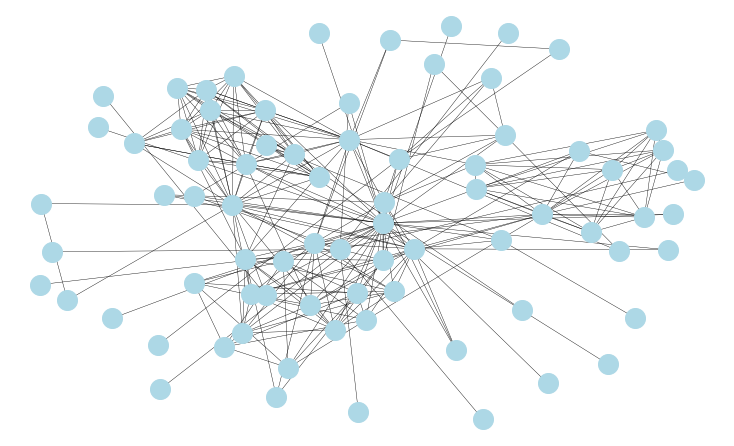

In [8]:
#visualize lesmis
plt.figure(figsize=(10,6))
pos = nx.spring_layout(lesmis, k=0.8)
nx.draw(lesmis, pos , with_labels = False, width=0.4, 
        node_color='lightblue', node_size=400)

In [9]:
#import dolphins.gml
dolphins = nx.read_gml('dolphins.gml')

In [10]:
#check if dolphins is directed
nx.is_directed(dolphins)

False

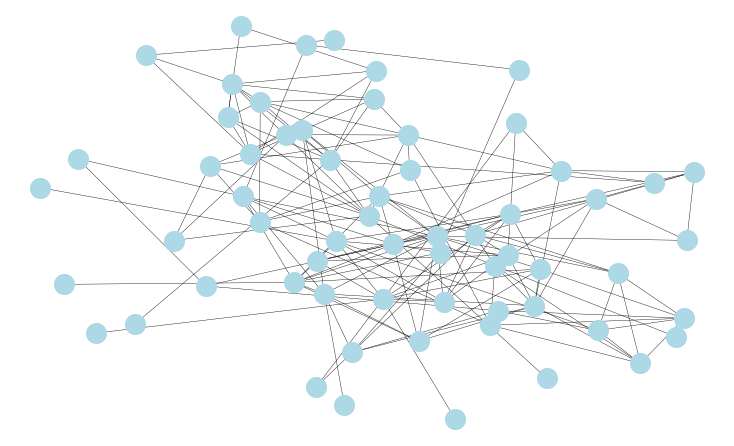

In [11]:
#visualize dolphins
plt.figure(figsize=(10,6))
pos = nx.spring_layout(dolphins, k=0.8)
nx.draw(dolphins, pos , with_labels = False, width=0.4, 
        node_color='lightblue', node_size=400)

In [12]:
#convert nodes' labels from strings to integers in real topologies
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

nfootball,football_map=conv2int(football,0)
nlesmis, lesmis_map=conv2int(lesmis,0)
ndolphins, dolphins_map=conv2int(dolphins,0)

#G=nx.relabel_nodes(nG,G_mapping)
football = nx.relabel_nodes(nfootball,football_map)
lesmis = nx.relabel_nodes(nlesmis,lesmis_map)
dolphins = nx.relabel_nodes(ndolphins,dolphins_map)

<h4>3. Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

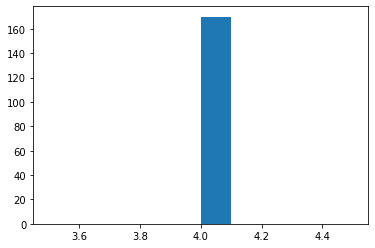

mean_degree_REG =  4.0 





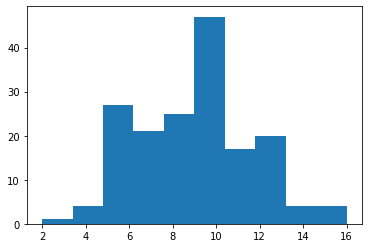

mean_degree_RGER =  8.823529411764707 





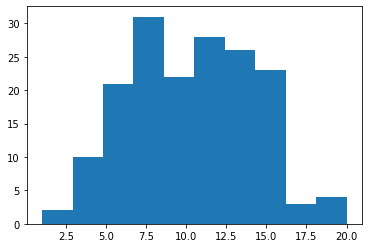

mean_degree_RGG =  10.235294117647058 





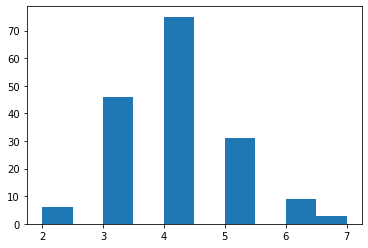

mean_degree_SW =  4.0 





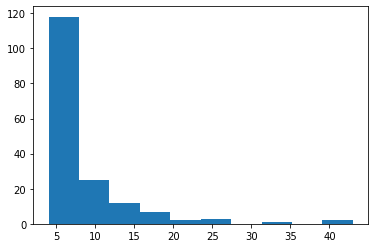

mean_degree_SF =  7.811764705882353 





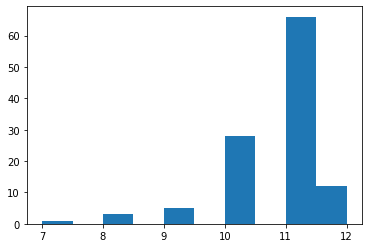

mean_degree_football =  10.660869565217391 





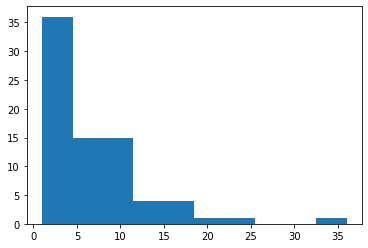

mean_degree_lesmis= =  6.597402597402597 





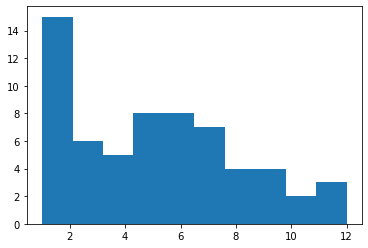

mean_degree_dolphins =  5.129032258064516 





In [13]:
def find_degree(G):
    return list(G.degree())


REG_degree = find_degree(REG)
RGER_degree = find_degree(RGER)
RGG_degree = find_degree(RGG)
SF_degree = find_degree(SF)
SW_degree = find_degree(SW)
football_degree = find_degree(football)
lesmis_degree = find_degree(lesmis)
dolphins_degree = find_degree(dolphins)


def degree_hist(G_degree):
    X2=[row[1] for row in G_degree]
    plt.hist(X2)
    plt.show()
    return X2

mean_degree_REG = np.mean(degree_hist(REG_degree))
print("mean_degree_REG = ", mean_degree_REG,"\n\n\n")
mean_degree_RGER= np.mean(degree_hist(RGER_degree))
print("mean_degree_RGER = ", mean_degree_RGER,"\n\n\n")
mean_degree_RGG= np.mean(degree_hist(RGG_degree))
print("mean_degree_RGG = ", mean_degree_RGG,"\n\n\n")
mean_degree_SW= np.mean(degree_hist(SW_degree))
print("mean_degree_SW = ", mean_degree_SW,"\n\n\n")
mean_degree_SF= np.mean(degree_hist(SF_degree))
print("mean_degree_SF = ", mean_degree_SF,"\n\n\n")
mean_degree_football= np.mean(degree_hist(football_degree))
print("mean_degree_football = ", mean_degree_football,"\n\n\n")
mean_degree_lesmis= np.mean(degree_hist(lesmis_degree))
print("mean_degree_lesmis= = ", mean_degree_lesmis,"\n\n\n")
mean_degree_dolphins= np.mean(degree_hist(dolphins_degree))
print("mean_degree_dolphins = ", mean_degree_dolphins,"\n\n\n")

**Football**: To χαρακτηριστικό αυτού του γράφου είναι ότι πολλοί κόμβοι έχουν πολλούς γείτονες. Κάτι αντίστοιχο δεν συναντάμε σε κανένα ιστόγραμμα  των γνωστών τοπολογιών. Θα μπορούσαμε να θεωρήσουμε ότι είναι αυτό το χαρακτηριστικό το έχει ο γράφος RGG με μεγάλη γειτονιά R.

**Lesmis**: Το ιστόγραμμα του μπορεί να αντιστοιχηθεί σε SF γράφο, καθώς το χαρακτηριστικό του είναι ότι πολλοί κόμβοι έχουν λίγους γέιτονες και λίγοι κόμβοι έχουν πολλούς

**Dolphins**: Εδώ φάινεται να έχουμε αρκετή τυχαιότητα στο σύμφωνα με το ιστόγραμμα. Θα μπορούσε να γίνει μια αντιστοίχηση με SF αλλά δεν είναι τόσο εμφανής όσο της περίπτωσης του Lesmis.

<h4>4. Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

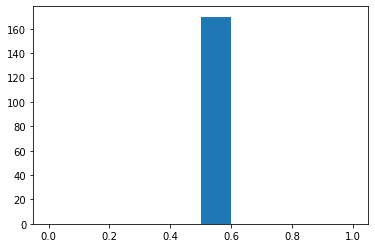

mean_cc_REG =  0.5 





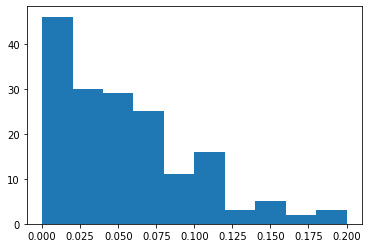

mean_cc_RGER =  0.05291114114643526 





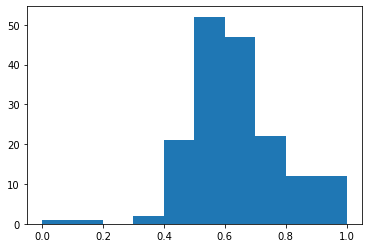

mean_cc_RGG =  0.6294891265374783 





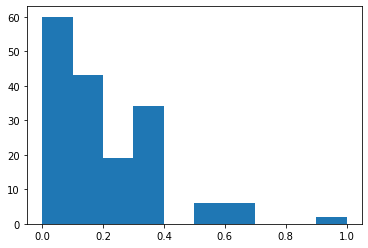

mean_cc_SW =  0.18411764705882352 





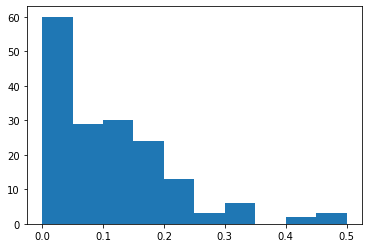

mean_cc_SF =  0.10483946647234892 





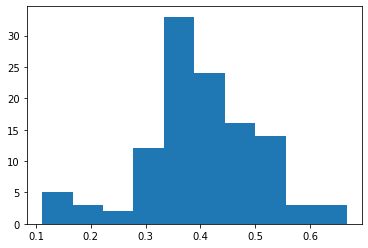

mean_cc_football =  0.40321601104209803 





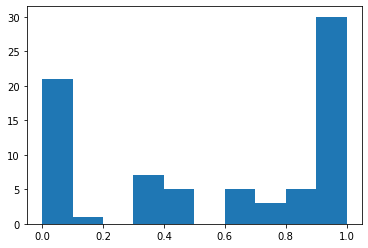

mean_cc_lesmis =  0.5731367499320135 





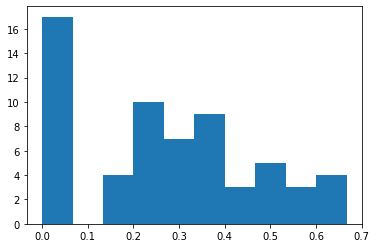

mean_cc_dolphins =  0.2589582460550202 





In [14]:
def clust_coef(G):
    return list(nx.clustering(G).values())


REG_cc = clust_coef(REG) 
RGER_cc = clust_coef(RGER) 
RGG_cc = clust_coef(RGG) 
SF_cc = clust_coef(SF) 
SW_cc = clust_coef(SW) 
football_cc = clust_coef(football)
lesmis_cc = clust_coef(lesmis)
dolphins_cc= clust_coef(dolphins)


def cc_hist(G_cc):
    plt.hist(G_cc)
    plt.show()
    return G_cc

mean_cc_REG=np.mean(cc_hist(REG_cc))
print("mean_cc_REG = ", mean_cc_REG,"\n\n\n")
mean_cc_RGER=np.mean(cc_hist(RGER_cc))
print("mean_cc_RGER = ", mean_cc_RGER,"\n\n\n")
mean_cc_RGG=np.mean(cc_hist(RGG_cc))
print("mean_cc_RGG = ", mean_cc_RGG,"\n\n\n")
mean_cc_SW=np.mean(cc_hist(SW_cc))
print("mean_cc_SW = ", mean_cc_SW,"\n\n\n")
mean_cc_SF=np.mean(cc_hist(SF_cc))
print("mean_cc_SF = ", mean_cc_SF,"\n\n\n")
mean_cc_football=np.mean(cc_hist(football_cc))
print("mean_cc_football = ", mean_cc_football,"\n\n\n")
mean_cc_lesmis=np.mean(cc_hist(lesmis_cc))
print("mean_cc_lesmis = ", mean_cc_lesmis,"\n\n\n")
mean_cc_dolphins=np.mean(cc_hist(dolphins_cc))
print("mean_cc_dolphins = ", mean_cc_dolphins,"\n\n\n")

**Football**: Επηρεασμένοι και από τα προηγούμενα αποτελέσματα παρατηρούμε την ομοίότητα του ιστογράμματος με το ιστογραμμα του RGG.

**Lesmis**: Εδώ βλέπουμε ότι ο γράφος από το Les Miserables έχει πολύ ψηλό CC, δηλαδή οι γείτονες των περισσότερων κόμβων έχουν πολλές απο τις διαθέσιμες ακμές, γεγονός που διαισθητικά μαζί και με την προηγούμενη πληροφορία μας κάνει να πιστεύουμε ότι αυτός ο γράφος έχει αρκετά μικρά clusters, κάτι το οποίο μπορεί να φανεί και από τον σχεδιασμό του

**Dolphins**: Εδώ ο γράφος μοιάζει με SF ή SW. Με βάση τον συνδιασμό του CC και του βαθμού, θα το θεωρήσουμε ως SF με μια μικρή βοήθεια από την παρατήρηση του σχεδιασμού του.

<h4>5. Μελέτη ενδιαμεσικής εγω-κεντρικότητας για πραγματικές και συνθετικές τοπολογίες </h4>

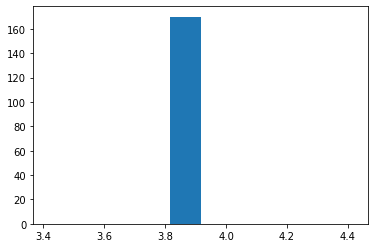

mean_ebtw_REG =  3.9166999999999996 





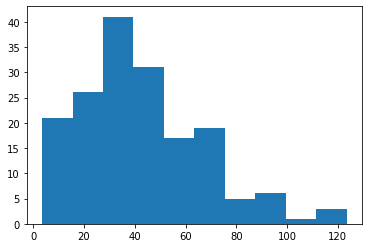

mean_ebtw_RGER =  42.957307647058826 





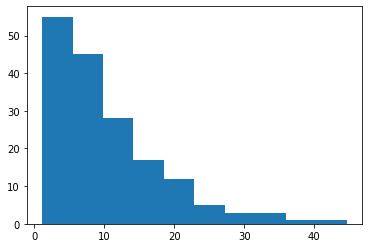

mean_ebtw_RGG =  10.313401764705882 





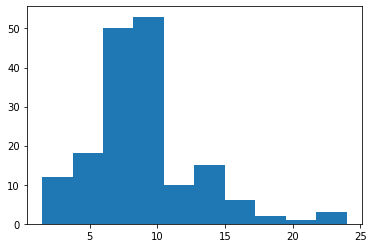

mean_ebtw_SW=  8.454177647058824 





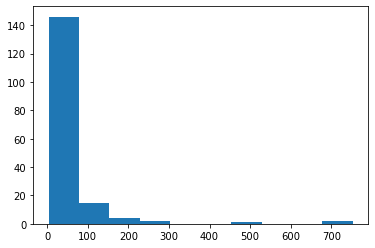

mean_ebtw_SF =  43.97839470588236 





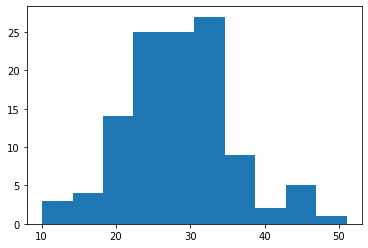

mean_ebtw_football =  28.428094782608692 





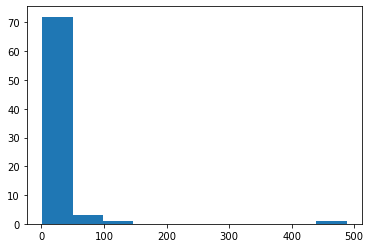

mean_ebtw_lesmis =  15.378772727272729 





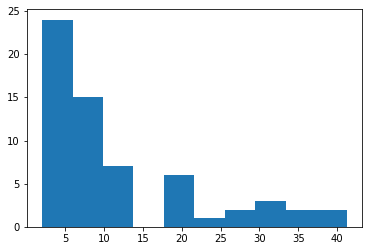

mean_ebtw_dolphins =  11.407567741935484 





In [15]:
def ego_centrality(G):
    ego_centrality = list()
    for n in G.nodes():
        ego_G = nx.ego_graph(G, n)
        A = nx.adjacency_matrix(ego_G).todense()
        geodesics = np.triu(np.multiply(np.linalg.matrix_power(A, 2), (np.ones(A.shape) - A)))
        entries = geodesics[np.nonzero(geodesics)]
        sum = 0
        for e in entries:
            sum = sum + 1/e
        ego_centrality.append(round(sum, 4))
    return ego_centrality

REG_ebtw = ego_centrality(REG) 
RGER_ebtw = ego_centrality(RGER) 
RGG_ebtw = ego_centrality(RGG) 
SF_ebtw = ego_centrality(SF) 
SW_ebtw = ego_centrality(SW) 
nfootball_ebtw = ego_centrality(football) 
nlesmis_ebtw = ego_centrality(lesmis) 
ndolphins_ebtw = ego_centrality(dolphins)


def egobtw_hist(G_ebtw): 
    plt.hist(G_ebtw)
    plt.show()
    return G_ebtw

mean_ebtw_REG=np.mean(egobtw_hist(REG_ebtw))
print("mean_ebtw_REG = ", mean_ebtw_REG,"\n\n\n")
mean_ebtw_RGER=np.mean(egobtw_hist(RGER_ebtw))
print("mean_ebtw_RGER = ", mean_ebtw_RGER,"\n\n\n")
mean_ebtw_RGG=np.mean(egobtw_hist(RGG_ebtw))
print("mean_ebtw_RGG = ", mean_ebtw_RGG,"\n\n\n")
mean_ebtw_SW=np.mean(egobtw_hist(SW_ebtw))
print("mean_ebtw_SW= ", mean_ebtw_SW,"\n\n\n")
mean_ebtw_SF=np.mean(egobtw_hist(SF_ebtw))
print("mean_ebtw_SF = ",mean_ebtw_SF,"\n\n\n")
mean_ebtw_football=np.mean(egobtw_hist(nfootball_ebtw))
print("mean_ebtw_football = ", mean_ebtw_football,"\n\n\n")
mean_ebtw_lesmis=np.mean(egobtw_hist(nlesmis_ebtw))
print("mean_ebtw_lesmis = ",mean_ebtw_lesmis,"\n\n\n")
mean_ebtw_dolphins=np.mean(egobtw_hist(ndolphins_ebtw))
print("mean_ebtw_dolphins = ", mean_ebtw_dolphins,"\n\n\n")

**Football**: Αρκετά έντονη η ομοιότητα με τον RGER </br>

**Lesmis**: Ξεκάθαρη ομοιότητα με SF </br>

**Dolphins**: Το Ego betweeness του γράφου μοιάζει με αυτό του RGG.

<h3> Τελικά Συμπεράσματα </h3>

Σύμφωνα με την οπτικοποίηση και με τα αποτελέσματα των μετρικών, η προσωπική μου εκτίμηση για τους πραγματικούς γράφους είναι η εξής:

**Football**: Ο γράφος θα μπορούσε να χαρακτηριστεί ως RGG, με βάση τα πρώτα δύο χαρακτηριστικά που μελετήσαμε με ένα αρκετα υψηλό R, δηλαδή γειτονία γειτνίασης </br>

**Lesmis**: Αναμφίβολα SF γράφος, και οι μετρικές αλλά και η οπτικοποίηση του μας οδήγησαν σε αυτή την απόφαση. </br>

**Dolphins**: Δεν μπορούμε να αποφανθούμε ξεκάθαρα για την κατηγορία της τοπολογίας του , ακόμα και η περιγραφή του dataset στην επίσημη ιστοσελίδα "an undirected social network of frequent associations between 62 dolphins" δεν μας επιτρέπει να το κατηγοριοποίησουμε. Πιθανότατα ένα SF χαρακτήρα αλλά με ένα περισσότερες συνδέσεις μεταξύ τους από ότι ο γράφος Lesmis.

<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<p>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<p>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία υπολογίστε το modularity χρησιμοποιώντας τη συνάρτηση <a style=text-decoration:none href='https://networkx.github.io/documentation/stable/_modules/networkx/algorithms/community/quality.html'>modularity</a>.</p>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

<h4>1. Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [16]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

<h4>2. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.</h4>

In [17]:
#girvan_newman:partitions of at most k=50 communities, select the one with the highest value of modularity.
#use nx.algorithms.community.centrality.girvan_newman for the communities
#nx.algorithms.community.quality.modularity to measure modularity
def comd_GN(G,k=50):
    best_mod = - sys.maxsize
    comp = nx.algorithms.community.centrality.girvan_newman(G)
    limited = itertools.takewhile(lambda c: len(c) <= k, comp)
    for communities in limited:
        test = nx.algorithms.community.quality.modularity(G, communities)
        if(test > best_mod):
            best_mod = test
            comm = communities
    return best_mod,[list(item) for item in comm]

In [18]:
mod_gn_reg,comd_GN_REG = comd_GN(REG)
mod_gn_rger,comd_GN_RGER = comd_GN(RGER)
mod_gn_rgg,comd_GN_RGG = comd_GN(RGG)
mod_gn_sf,comd_GN_SF = comd_GN(SF)
mod_gn_sw,comd_GN_SW = comd_GN(SW)
mod_gn_football,comd_GN_football = comd_GN(football)
mod_gn_lesmis,comd_GN_lesmis = comd_GN(lesmis)
mod_gn_dolphins,comd_GN_dolphins = comd_GN(dolphins)

<h4>3. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering.</h4>

In [39]:
#Spectral Clustering:all partitions of k={1,..50} communities
#use SpectralClustering for the communities
#nx.algorithms.community.quality.modularity to measure modularity

def comd_SP(G,k = 50):
    best_mod = - sys.maxsize
    nodes = list(G.nodes())
    adj_mat = nx.to_numpy_matrix(G)
    for i in range(1, k):
        comm = dict()
        sc = SpectralClustering(n_clusters=i, affinity='precomputed')
        sc.fit(adj_mat)
        for x in sc.labels_:
            if x not in comm:
                comm[x] = list()
        for x in range(len(sc.labels_)):
            comm[sc.labels_[x]].append(nodes[x])
        test = nx.algorithms.community.quality.modularity(G, list(comm.values()))
        if(test > best_mod):
            best_mod = test
            communities = comm
    return best_mod,list(communities.values())


In [40]:
mod_sp_reg,REG_SP = comd_SP(REG)
mod_sp_rger,RGER_SP = comd_SP(RGER)
mod_sp_rgg,RGG_SP = comd_SP(RGG)
mod_sp_sf,SF_SP = comd_SP(SF)
mod_sp_sw,SW_SP = comd_SP(SW)
mod_sp_football,football_SP = comd_SP(football)
mod_sp_lesmis,lesmis_SP = comd_SP(lesmis)
mod_sp_dolphins,dolphins_SP = comd_SP(dolphins)

<h4>4. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.</h4>

In [37]:
#Modularity Maximization
#use nx.algorithms.community.modularity_max.greedy_modularity_communities for the communities
#nx.algorithms.community.quality.modularity to measure modularity

def comd_MM(G):
    mod=0
    mm = list(nx.algorithms.community.modularity_max.greedy_modularity_communities(G))
    mod = nx.algorithms.community.quality.modularity(G, mm)
    return mod,[list(m) for m in mm]
 

In [38]:
mod_mm_reg,REG_MM = comd_MM(REG)
mod_mm_rger,RGER_MM = comd_MM(RGER)
mod_mm_rgg,RGG_MM = comd_MM(RGG)
mod_mm_sf,SF_MM = comd_MM(SF)
mod_mm_sw,SW_MM = comd_MM(SW)
mod_mm_football,football_MM = comd_MM(football)
mod_mm_lesmis,lesmis_MM = comd_MM(lesmis)
mod_mm_dolphins,dolphins_MM = comd_MM(dolphins)

<h4>5. Οπτικοποίηση κοινοτήτων σε συνθετικά και πραγματικά δίκτυα.</h4>

In [41]:
def visual_com(G,partition,title,mod):
#use from networkx: draw_networkx_nodes (and the attribute nodelist), and draw_networkx_edges
    comm = list()
    for n in G.nodes():
        comm.append(next(index for index, value in enumerate(partition) if n in value))
    pos = nx.spring_layout(G) 
    fig = plt.figure(figsize=(10, 10)) 
    fig.suptitle('\n\n'+title +' '+ str(max(comm)+1) +' communities'+' , Modularity ='+str(mod) , fontsize=16)
    nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.gist_rainbow, node_color=comm, vmin=min(comm), vmax=max(comm)+1)
    nx.draw_networkx_edges(G, pos, alpha=0.4)

<p>a. Οπτικοποίηση κοινοτήτων Les Miserables.</p>

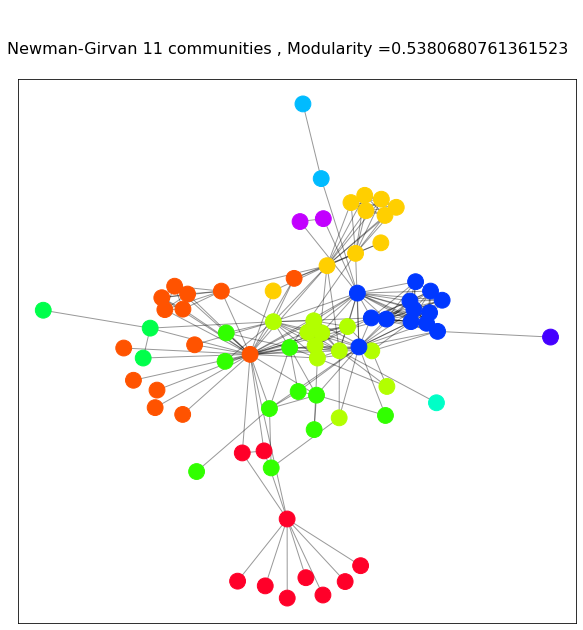

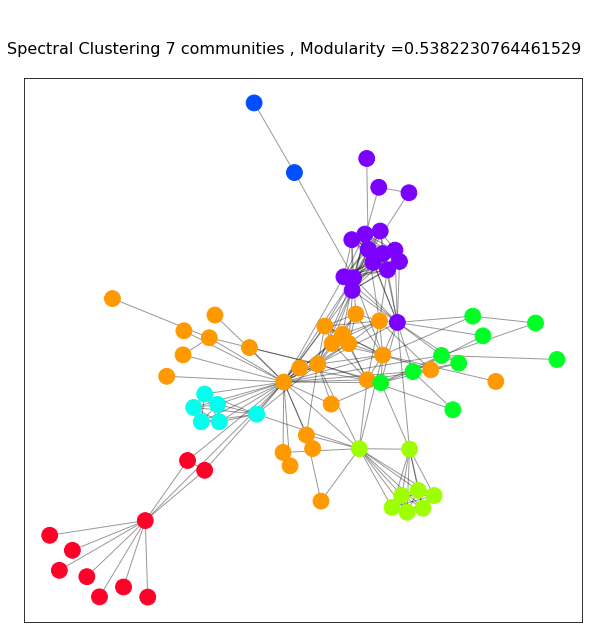

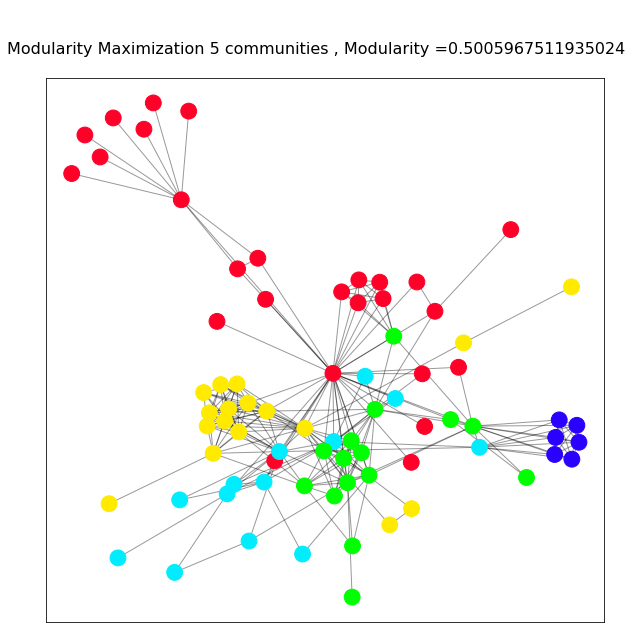

In [42]:
visual_com(lesmis, comd_GN_lesmis, 'Newman-Girvan',mod_gn_lesmis)
visual_com(lesmis, lesmis_SP, 'Spectral Clustering',mod_sp_lesmis)
visual_com(lesmis, lesmis_MM, 'Modularity Maximization',mod_mm_lesmis)

<p>b. Οπτικοποίηση κοινοτήτων American College Football.</p>

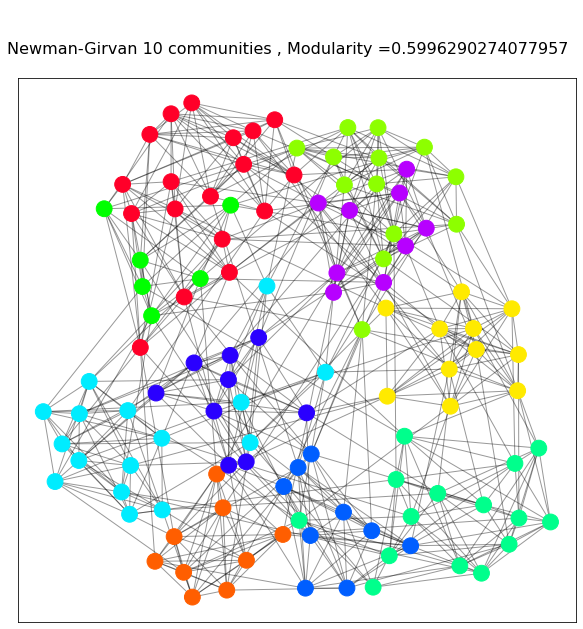

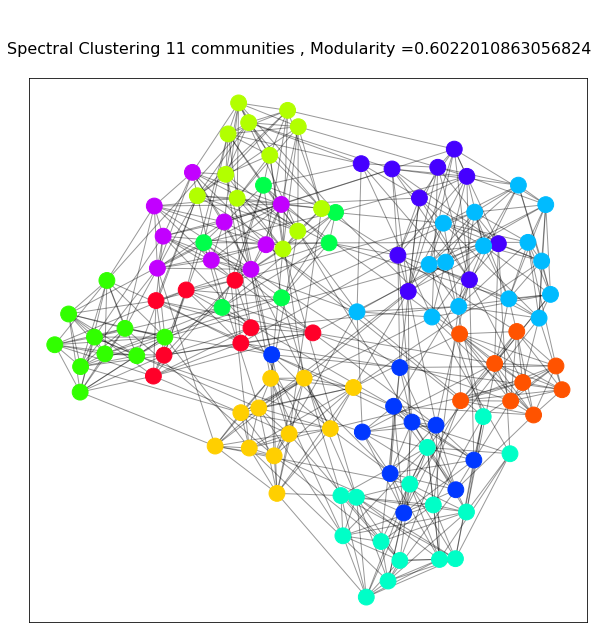

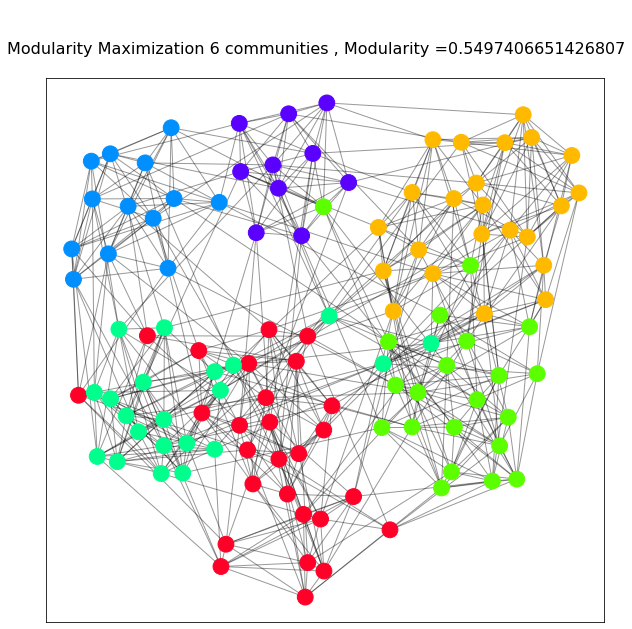

In [43]:
visual_com(football, comd_GN_football, 'Newman-Girvan',mod_gn_football)
visual_com(football, football_SP, 'Spectral Clustering',mod_sp_football)
visual_com(football, football_MM, 'Modularity Maximization',mod_mm_football)

<p>c. Οπτικοποίηση κοινοτήτων Dolphins.</p>

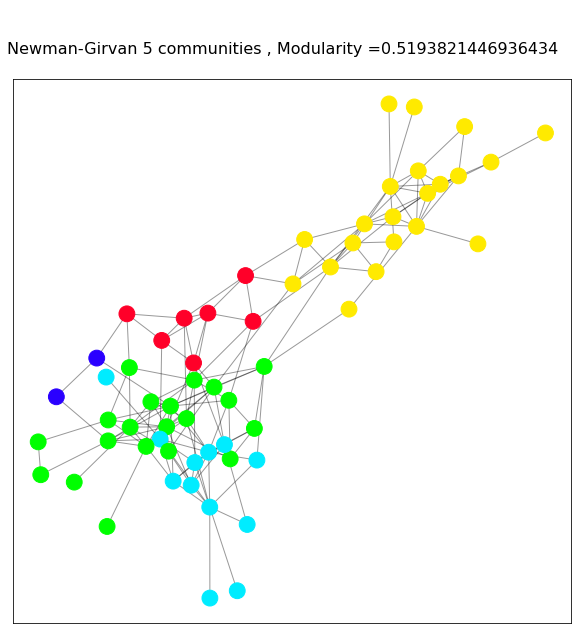

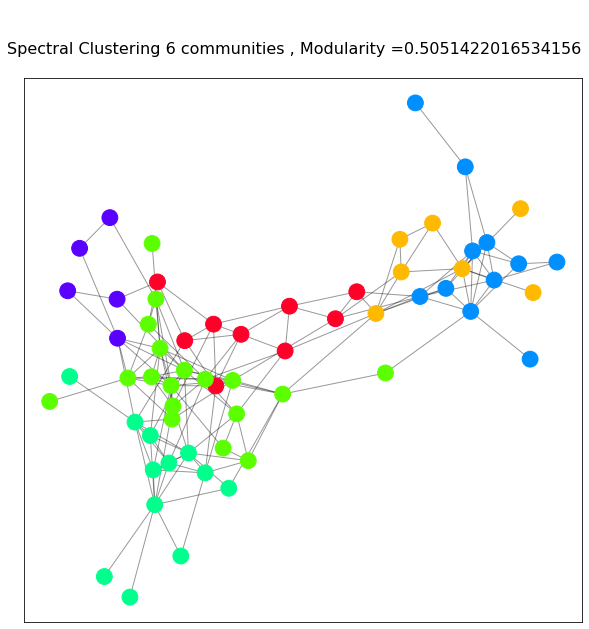

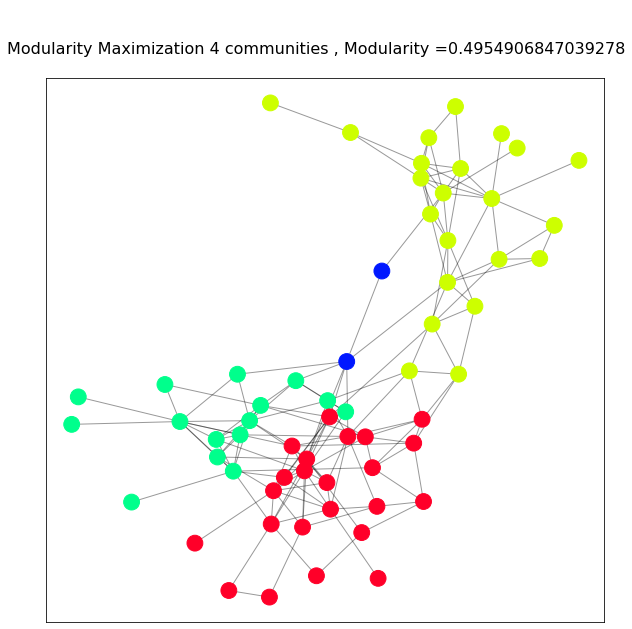

In [44]:
visual_com(dolphins, comd_GN_dolphins, 'Newman-Girvan',mod_gn_dolphins)
visual_com(dolphins, dolphins_SP, 'Spectral Clustering',mod_sp_dolphins)
visual_com(dolphins, dolphins_MM, 'Modularity Maximization',mod_mm_dolphins)

<p>d. Οπτικοποίηση κοινοτήτων REG.</p>

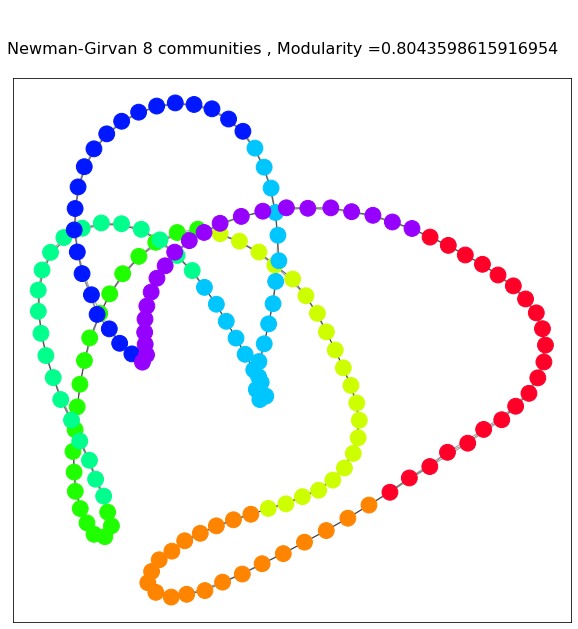

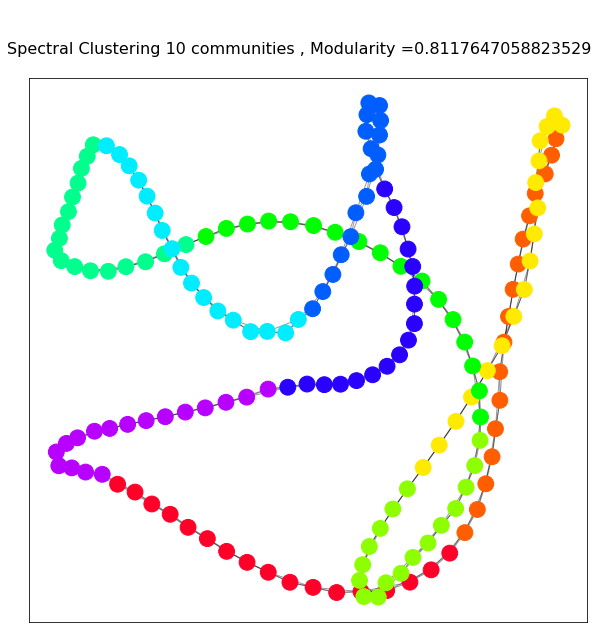

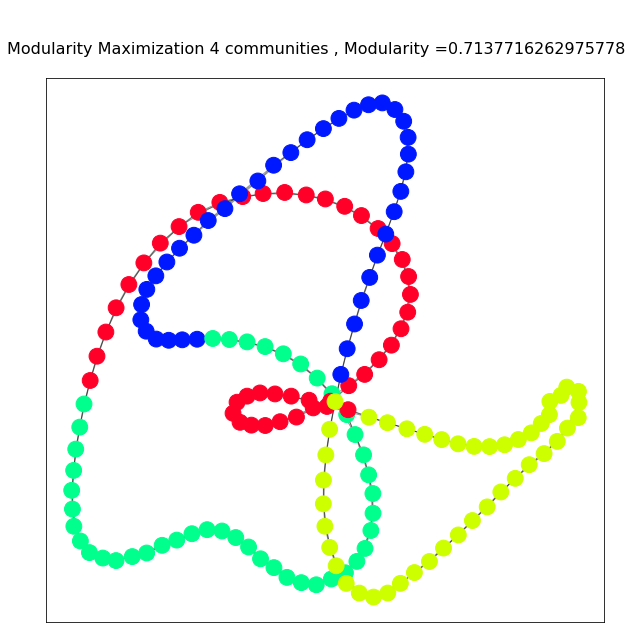

In [45]:
visual_com(REG, comd_GN_REG, 'Newman-Girvan',mod_gn_reg)
visual_com(REG, REG_SP, 'Spectral Clustering',mod_sp_reg)
visual_com(REG, REG_MM, 'Modularity Maximization',mod_mm_reg)

<p>e. Οπτικοποίηση κοινοτήτων RGER.</p>

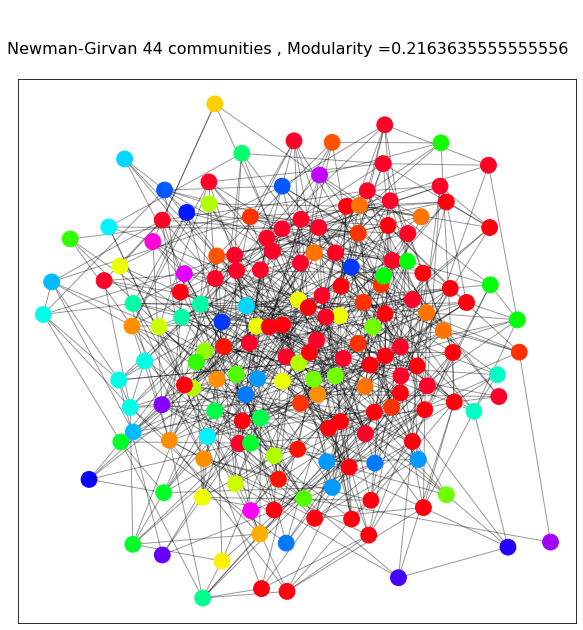

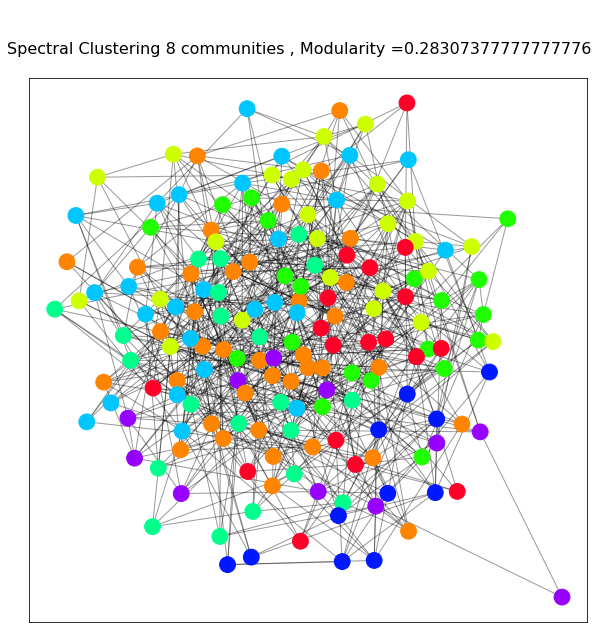

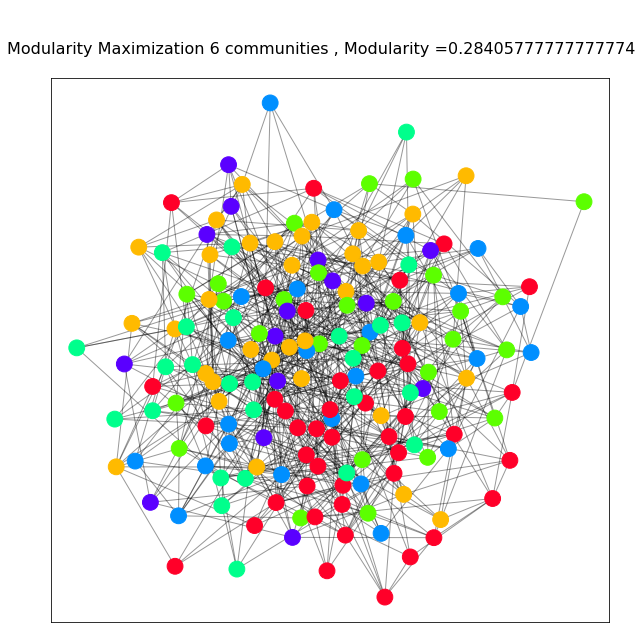

In [46]:
visual_com(RGER, comd_GN_RGER, 'Newman-Girvan',mod_gn_rger)
visual_com(RGER, RGER_SP, 'Spectral Clustering',mod_sp_rger)
visual_com(RGER, RGER_MM, 'Modularity Maximization',mod_mm_rger)

<p>f. Οπτικοποίηση κοινοτήτων RGG.</p>

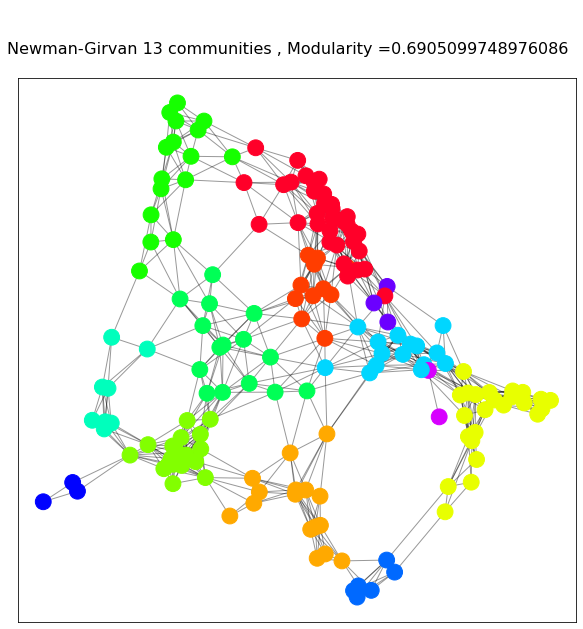

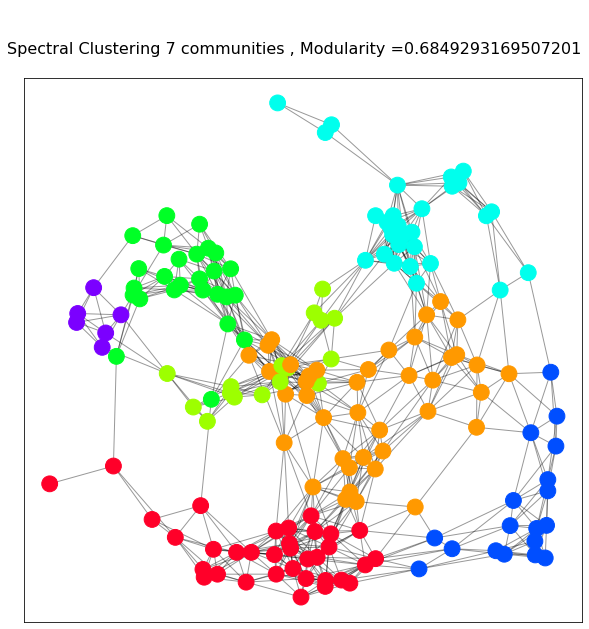

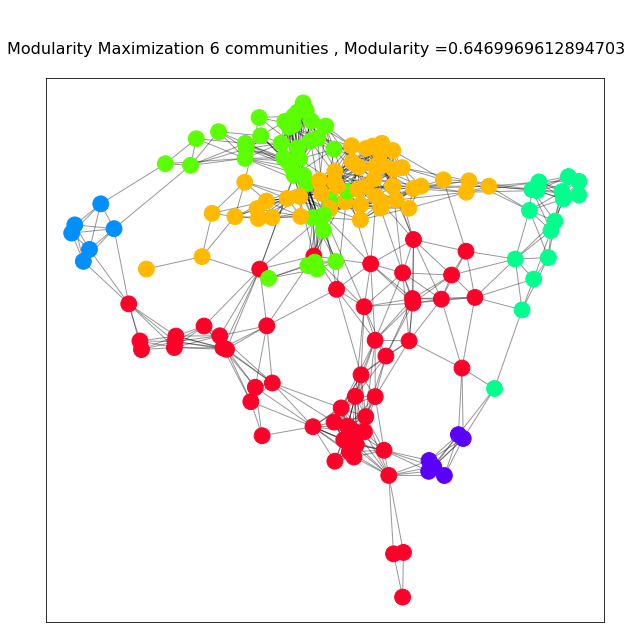

In [47]:
visual_com(RGG, comd_GN_RGG, 'Newman-Girvan',mod_gn_rgg)
visual_com(RGG, RGG_SP, 'Spectral Clustering',mod_sp_rgg)
visual_com(RGG, RGG_MM, 'Modularity Maximization',mod_mm_rgg)

<p>g. Οπτικοποίηση κοινοτήτων SW.</p>

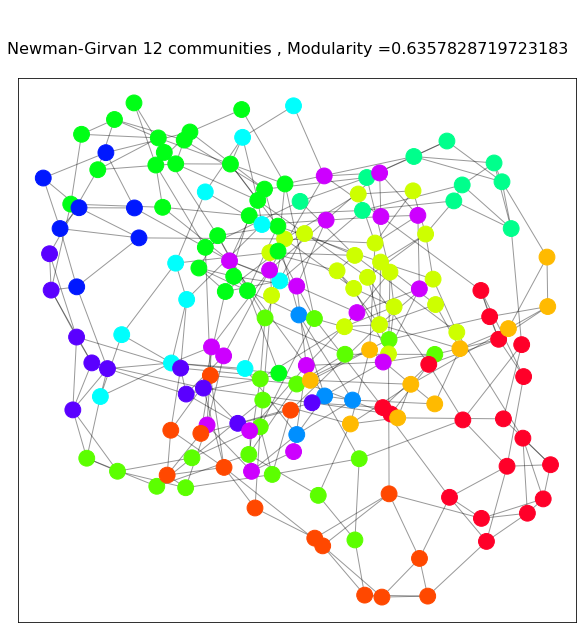

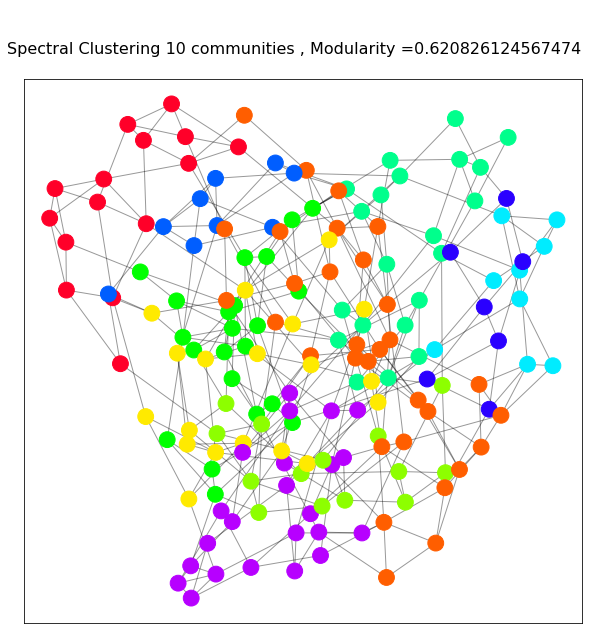

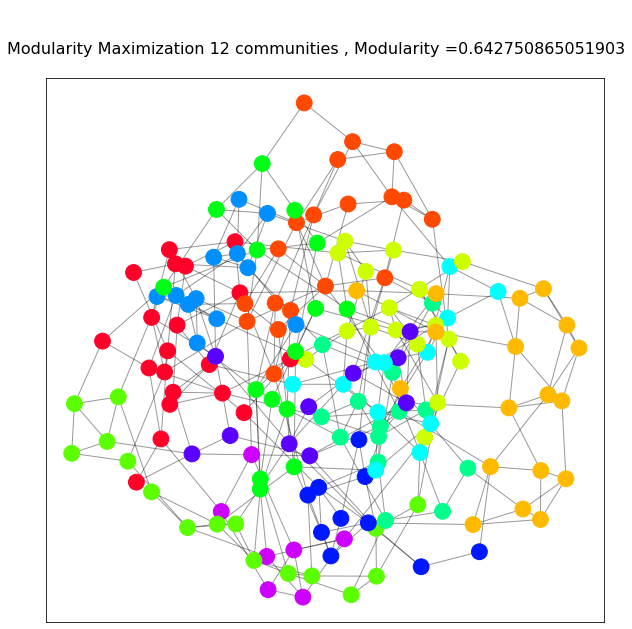

In [48]:
visual_com(SW, comd_GN_SW, 'Newman-Girvan',mod_gn_sw)
visual_com(SW, SW_SP, 'Spectral Clustering',mod_sp_sw)
visual_com(SW, SW_MM, 'Modularity Maximization',mod_mm_sw)

<p>h. Οπτικοποίηση κοινοτήτων SF.</p>

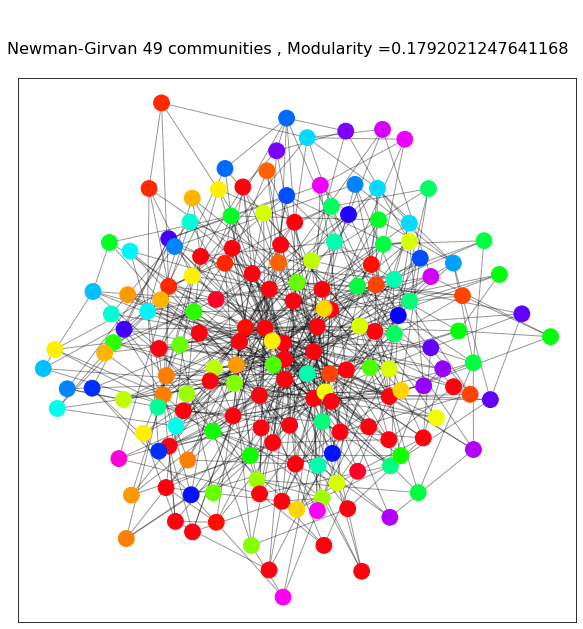

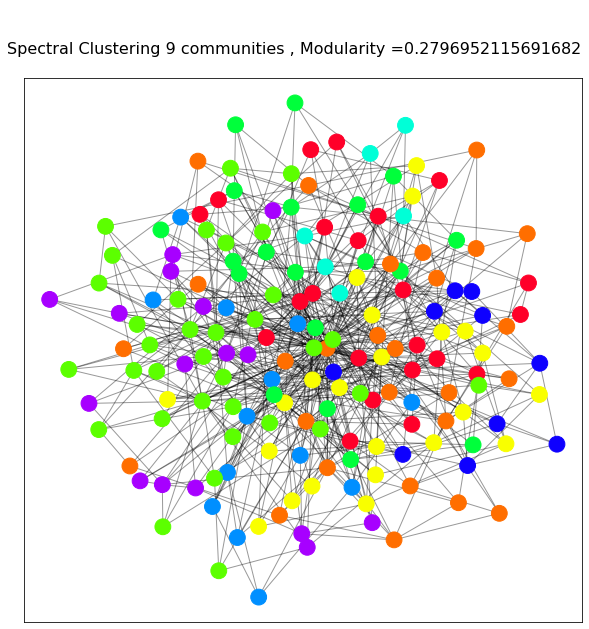

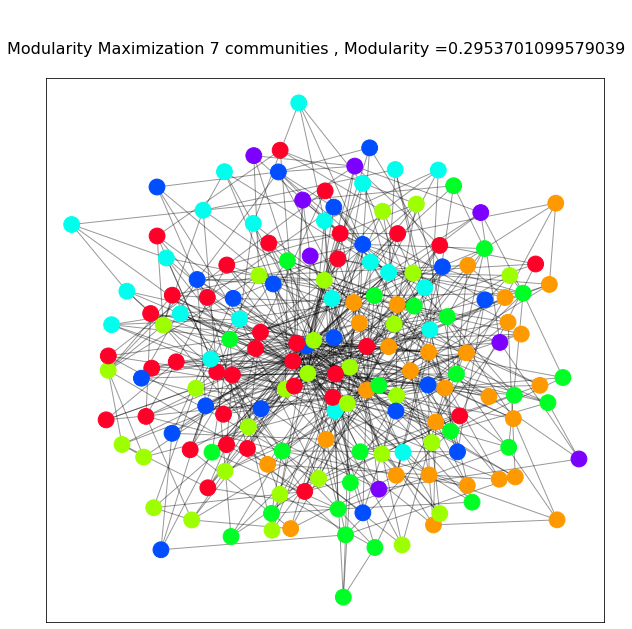

In [49]:
visual_com(SF, comd_GN_SF, 'Newman-Girvan',mod_gn_sf)
visual_com(SF, SF_SP, 'Spectral Clustering',mod_sp_sf)
visual_com(SF, SF_MM, 'Modularity Maximization',mod_mm_sf)

##### Παρατηρούμε ότι o αλγόριθμος Modularity Maximization δεν επιστρέφει πάντοτε τις κοινότητες με το μεγαλύτερο Modularity, αυτό συμβαίνει γιατί ακολουθεί greedy τεχνική που δεν οδηγεί στο βέλτιστο αποτέλεσμα.

##### Παρατηρούμε ότι οι τιμές του Modularity, είναι αρκετά κοντά για όλους τους αλγορίθμους παρόλο που ορισμένες φορές ο διαχωρισμός που επιστρέφουν είναι αρκετά διαφορετικός πχ. Scale-Free.

**REG**: Ο τύπος γράφου που επιτυγχάνει το μεγαλύτερο Modularity, ένδειξη ότι είναι εύκολα διαχωρίσιμος σε κοινότητες καθώς η τοπολογία του είναι σχεδιασμένη για αυτό το σκοπό. Κάθε κοινότητα έχει σχεδόν το ίδιο πλήθος κόμβων και πρόκεται για γειτονικούς κόμβους. Υποθέτουμε ότι κατα τη διάρκεια του αλγορίθμου πολλές ακμές ή κόμβοι θα ισοβαθμούσαν στα κριτήρια διαχωρισμού. 

**RGER**: Δεν μπορεί να προκύψει κάποιο συμπέρασμα λόγω της τυχαιότητας της τοπολογίας, δεν έχουμε κάποιο τοπολογικό μοτίβο που μπορεί να ερμηνευθεί και έτσι βλέπουμε και ένα σχετικό Modularity.

**RGG**: Παρατηρούμε μεγάλη τιμή για το Modularity σαν ένδειξη ότι αυτή η τοπολογία έχει κάποιο χαρακτηριστικό που μπορεί να χρησιμοποιηθεί για διαχωρισμό σε κοινότητες. Φυσικά αυτό το χαρακτηριστικό είναι η γεωμετρική απόσταση καθώς ενώνονται κόμβοι που είναι κοντά και με αυτό τον τρόπο διαισθητικά καταλαβαινουμε ότι αυτές θα είναι και οι αντίστοιχες κοινότητες.

**SF**: Παρατηρούμε χαμηλό Modularity , όχι τόσο ενθαρρυντικό για τον διαχωρισμό. Από το χαρακτηριστικό της συγκεκριμένης τοπολογίας υποθέτουμε ότι οι κόμβοι με το μεγάλο βαθμό δημιουργούν κοινότητες, παρόλα αυτά οι αλγόριθμοι διαχωρισμού έχουν μεγάλη απόκλιση στην τιμή των κοινοτήτων.

**SW**: Το χαρακτηριστικό των Small-World γράφων είναι ότι με μικρό μέγεθος μονοπατιού οι περισσότεροι κόμβοι είναι προσβάσιμοι. Αυτο το στοιχείο μπορεί να οδηγήσει σε κάποιο διαχωρισμό καθώς οι μεταξύ τους προσβασιμοι κόμβοι, μπορούν να τοποθετηθούν στην ίδια κοινότητα. Παρατηρούμε μια αρκετά υψηλή τιμή στο Modularity , ως ένδειξη ότι έχει γίνει ένας καλός διαχωρισμός

**Football**: Είχαμε υποθέσει σε προηγούμενα ερωτήματα ότι ο γράφος Football έχει στοιχεία RGG γράφου, πράγματι βλέπουμε τις ομοιότητες του διαχωρισμού με αυτές του RGG. Είναι αρκετά ξεκάθαρος ο διαχωρισμός στον γράφο Football με τις ομάδες να διαχωρίζονται ανάλογα την κατηγορία τους.

**Les Miserables**:  Παρόλο που είχαμε υποθέσει ότι ανήκει στη τοπολογία SF , βλέπουμε ότι δεν μοιράζεται τα ίδια χαρακτηριστικά στον σχχηματισμό κοινοτήτων, και θύμιζει πιο πολύ RGG γράφο. Όμως η περιγραφή του συγκεκριμένου γράφου απο την πηγή του, μας κάνει να υποστηρίξουμε την αρχική μας τοποθέτηση για SF γράφο, απλά μοιράζεται χαρακτηριστικά και από άλλες τοπολογίες - RGG -  όπως φαίνεται απο εδώ

**Dolphins**: Δεν είχαμε αποφαυνθεί για την τοπολογία του σε προηγούμενο ερώτημα. Το σκεπτικό μας για αυτόν τον γράφο είναι ότι θυμίζει αρκετά τον διαχωρισμό του Lesmis , ο οποίος είναι SF δηλαδή έχει λίγους κόμβους με μεγάλο βαθμό. Αυτο παρατηρούμε και εδώ, δηλαδή κοινότητες γύρω απο κόμβους με μεγάλο βαθμό.